In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Run this cell to display all output within each cell in Jupyter Notebook, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
file = '../data/Seattle_Streets.csv'
df = pd.read_csv(file)

In [4]:
df.head()

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIPT,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWIDTH,SURFACETYPE_1,SURFACETYPE_2,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYSYS,STREETTYPE,PVMTCONDINDX1,PVMTCONDINDX2,TRANCLASS,TRANDESCRIPT,SLOPE_PCT,PVMTCATEGORY,PARKBOULEVARD,SHAPE_Length
0,1,2.0,1006,10.0,120.0,100120.0,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,Minor Arterial,,INSVC,1200.0,25.0,NW,N,,,306.0,48.0,PCC,AC/PCC,1ST AVE AND SENECA ST,NW,29611.0,1ST AVE AND UNIVERSITY ST,SE,N,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050
1,2,2.0,1009,10.0,150.0,100150.0,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,Minor Arterial,,INSVC,1500.0,25.0,NW,N,,,426.0,104.0,AC/PCC,PCC,1ST AVE AND PIKE ST,NW,29593.0,1ST AVE AND PINE ST,SE,N,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562
2,3,0.0,1032,15.0,80.0,150080.0,1ST AVE N BETWEEN VALLEY UPPER ST AND ALOHA ST,1ST AVE N,VALLEY UPPER ST,ALOHA ST,Not Designated,,INSVC,800.0,20.0,N,N,,,297.0,0.0,PCC,NaN,1ST AVE N AND VALLEY UPPER ST,N,28897.0,1ST AVE N AND ALOHA ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,17.0,NON-ART,N,297.147592
3,4,0.0,1051,15.0,230.0,150230.0,1ST AVE N BETWEEN LYNN ST AND MCGRAW S ST,1ST AVE N,LYNN ST,MCGRAW S ST,Not Designated,,INSVC,2200.0,20.0,N,N,,,175.0,25.0,AC,NaN,1ST AVE N AND LYNN ST,N,28113.0,1ST AVE N AND MCGRAW S ST,S,N,Neighborhood Yield Street,9.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,174.804983
4,5,0.0,1060,15.0,282.0,150282.0,1ST AVE N BETWEEN FULTON S ST AND FULTON N ST,1ST AVE N,FULTON S ST,FULTON N ST,Not Designated,,INSVC,2800.0,20.0,N,N,,,73.0,0.0,PCC,NaN,1ST AVE N AND FULTON S ST,N,28051.0,1ST AVE N AND FULTON N ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,5.0,NON-ART,N,73.110708


In [5]:
df.shape

(23806, 38)

In [6]:
df.columns

Index(['OBJECTID', 'ARTCLASS', 'COMPKEY', 'UNITID', 'UNITID2', 'UNITIDSORT',
       'UNITDESC', 'STNAME_ORD', 'XSTRLO', 'XSTRHI', 'ARTDESCRIPT', 'OWNER',
       'STATUS', 'BLOCKNBR', 'SPEEDLIMIT', 'SEGDIR', 'ONEWAY', 'ONEWAYDIR',
       'FLOW', 'SEGLENGTH', 'SURFACEWIDTH', 'SURFACETYPE_1', 'SURFACETYPE_2',
       'INTRLO', 'DIRLO', 'INTKEYLO', 'INTRHI', 'DIRHI', 'NATIONHWYSYS',
       'STREETTYPE', 'PVMTCONDINDX1', 'PVMTCONDINDX2', 'TRANCLASS',
       'TRANDESCRIPT', 'SLOPE_PCT', 'PVMTCATEGORY', 'PARKBOULEVARD',
       'SHAPE_Length'],
      dtype='object')

# ABOUT THE DATA FEATURES
<b>OBJECTID</b> - ESRI unique identifier

<b>ARTCLASS</b> - Arterial classification code:
    <ol>5 - Interstate Freeway
    <br>4 - State Highway
    <br>3 - Collector Arterial
    <br>2 - Minor Arterial
    <br>1 - Principal Arterial
    <br>0 - Not Designated (not an arterial)</ol>
    
<b>COMPKEY</b> - Primary key of the Street asset table, assigned
by the Hansen asset management system. 
    
<b>UNITID</b> - <i>N/A</i>  

<b>UNITID2</b> - <i>N/A</i>   

<b>UNITIDSORT</b> - Alpha-numeric Hansen unique identifier

<b>UNITIDESC</b> - Structured description of the Street location

<b>STNAME_ORD</b> - Street segment name   

<b>XSTRLO</b> - Cross street at low end of segment

<b>XSTRHI</b> - Cross street at high end of segment    

<b>ARTDESCRIPT</b> - Arterial class code description   

<b>OWNER</b> - The organization that owns the street, if not the city  

<b>STATUS</b> - Current street status <i> INSVC = in service </i>  

<b>BLOCKNBR</b> - Identification number of block street runs adjacent to

<b>SPEEDLIMIT</b> - Speed limit in MPH    

<b>SEGDIR</b> - Street segment direction   

<b>ONEWAY</b> - One Way Street (Y/N)    

<b>ONEWAYDIR</b> - One Way Street traffic flow direction

<b>FLOW</b> - One Way Street traffic flow classification    

<b>SEGLENGTH</b> - Street segment length in feet   

<b>SURFACEWIDTH</b> - Street segment width in feet     

<b>SURFACETYPE_1</b> - Primary pavement used on Street surface
    <ol>AC - Asphalt Concrete
    <br>PCC - Rigid Pavement
    <br>AC/PCC - Composite AC and PCC
    <br>ST - Bituminous Surface Treatment

<b>SURFACETYPE_2</b> - Secondary pavement used on Street surface     

<b>INTRLO</b> - Description of the intersection location with cross street at high address end of segment    

<b>DIRLO</b> - Relative direction of low address end of segment   

<b>INTKEYLO</b> - Intersection key at low address end of segment     

<b>INTRHI</b> - Description of the intersection location with cross street at high address end of segment      

<b>DIRHI</b> - Direction of high address end of segment   

<b>NATIONHWYSYS</b> - Whether the street is part of the National Highway System (Y/N)      

<b>STREETTYPE</b> - Street type classification (from Seattle Right of Way Improvements Manual) 
    https://streetsillustrated.seattle.gov/https-streetsillustrated-seattle-gov-wp-content-uploads-2019-12-streettyperelationships-movementplacev4-jpg/street-classification/

<b>PVMTCONDINDX1</b> - Primary pavement condition, out of 100     

<b>PVMTCONDINDX2</b> - Secondary pavement condition, out of 100     

<b>TRANCLASS</b> - Street transit classification   

<b>TRANDESCRIPT</b> - Transit class description

<b>SLOPE_PCT</b> - Street grade in slope percentage 

<b>PVMTCATEGORY</b> - <i>N/A</i> 

<b>PARKBOULEVARD</b> - <i>N/A</i> 
    
<b>SHAPE_Length</b> - ESRI field that stores information about the length of a feature in GIS     

In [7]:
# Consider how many missing and unique values there are in each column
col_na = round(100*(df.isna().sum()/len(df)), 2)
col_nunique = df.nunique()
df_summary = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary

,data_type,percent_missing_values,total_unique_values
SURFACETYPE_2,object,97.13,5
SURFACETYPE_1,object,5.03,6
STREETTYPE,object,3.33,12
TRANDESCRIPT,object,0.79,7
SLOPE_PCT,float64,0.08,34
INTRHI,object,0.05,14234
ONEWAY,object,0.05,2
SURFACEWIDTH,float64,0.04,94
INTKEYLO,float64,0.04,14110
INTRLO,object,0.04,14109


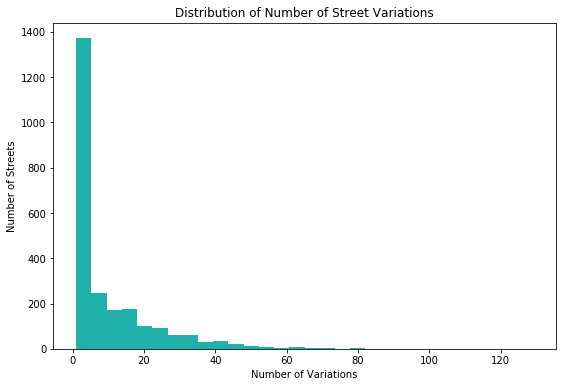

In [8]:
#DISTRIBUTION OF VARIATIONS BY STREET
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(df['STNAME_ORD'].value_counts(), bins=30, color='lightseagreen')
ax.set_title('Distribution of Number of Street Variations')
ax.set_xlabel('Number of Variations')
ax.set_ylabel('Number of Streets');

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Number of Streets in Seattle by Arterial Class')

Text(0, 0.5, 'Number of Streets')

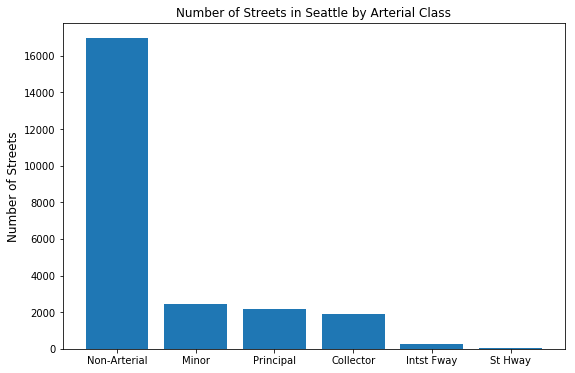

In [9]:
#ARTERIAL CLASS DISTRIBUTION
artclass_dict = {5 : 'Intst Fway',
                 4 : 'St Hway',
                 3 : 'Collector',
                 2 : 'Minor',
                 1 : 'Principal',
                 0 : 'Non-Arterial'}

fig, ax = plt.subplots(figsize=(9,6))
arterials = df.ARTCLASS.value_counts().iloc[:6]

ax.bar([artclass_dict[i] for i in arterials.index], arterials)
ax.set_title('Number of Streets in Seattle by Arterial Class')
ax.set_ylabel('Number of Streets', size=12)
#plt.savefig('Arterials.png');

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Distribution of Speed Limits on Seattle Streets')

Text(0.5, 0, 'Miles Per Hour')

Text(0, 0.5, 'Number of Streets')

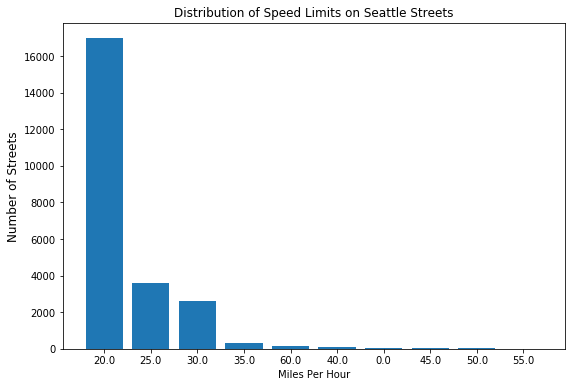

In [10]:
#Speed Limits 
fig, ax = plt.subplots(figsize=(9,6))
speeds = df.SPEEDLIMIT.value_counts()
ax.bar(speeds.index.astype(str), speeds)
ax.set_title('Distribution of Speed Limits on Seattle Streets')
ax.set_xlabel('Miles Per Hour')
ax.set_ylabel('Number of Streets', size=12)
#plt.savefig('Speeds.png');

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Distribution of Pavement Types on Seattle Streets')

Text(0, 0.5, 'Number of Streets')

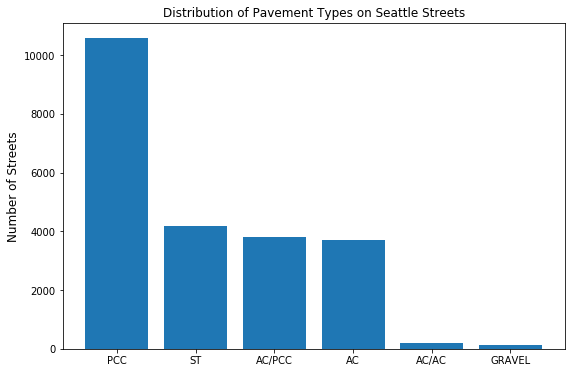

In [11]:
#Speed Limits 
fig, ax = plt.subplots(figsize=(9,6))
speeds = df.SURFACETYPE_1.value_counts()
ax.bar(speeds.index, speeds)
ax.set_title('Distribution of Pavement Types on Seattle Streets')
ax.set_ylabel('Number of Streets', size=12)
#plt.savefig('Surfaces.png');

In [12]:
#TO_DO
#DICTIONARY FOR ALL INTERSECTIONS ALONG STREETS ??
    #REGEX WILL BE NEEDED AS COLLISSIONS DATA DOES NOT INCLUDE STREET NAME (?)

In [13]:
df[df.SURFACETYPE_1.isna()]

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIPT,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWIDTH,SURFACETYPE_1,SURFACETYPE_2,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYSYS,STREETTYPE,PVMTCONDINDX1,PVMTCONDINDX2,TRANCLASS,TRANDESCRIPT,SLOPE_PCT,PVMTCATEGORY,PARKBOULEVARD,SHAPE_Length
147,148,1.0,2918,988.0,10.0,9880010.0,2ND AV SW OFF RP BETWEEN SR509 SB AND 2ND AV S...,2ND AV SW OFF RP,SR509 SB,2ND AV SW TURN RD,Principal Arterial,WSDOT,INSVC,0.0,40.0,SW,Y,SW,F,157.0,0.0,NaN,NaN,2ND AV SW OFF RP AND SR509 SB,SW,34114.0,2ND AV SW OFF RP AND 2ND AV SW TURN RD,NE,N,NaN,0.0,0.0,1,PRINCIPAL TRANSIT ROUTE,1.0,ART,N,157.113125
300,301,0.0,4868,2280.0,630.0,22800630.0,31ST AVE SW BETWEEN SW GRAHAM ST AND SW BATAAN ST,31ST AVE SW,SW GRAHAM ST,SW BATAAN ST,Not Designated,,INSVC,6300.0,20.0,S,N,,,471.0,0.0,NaN,NaN,31ST AVE SW AND SW GRAHAM ST,S,33011.0,31ST AVE SW AND SW BATAAN ST,N,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,1.0,NON-ART,N,471.013524
611,612,1.0,8907,5250.0,90.0,52500090.0,AURORA AVE N BETWEEN ALOHA ST AND WARD ST,AURORA AVE N,ALOHA ST,WARD ST,Principal Arterial,WSDOT,INSVC,900.0,40.0,N,N,,,319.0,0.0,NaN,NaN,ALOHA ST AND AURORA AVE N,N,28730.0,AURORA AVE N AND WARD ST,S,N,Urban Village Main,0.0,0.0,2,MAJOR TRANSIT ROUTE,4.0,ART,N,319.284006
612,613,1.0,8915,5250.0,220.0,52500220.0,AURORA AVE N BETWEEN LYNN ST AND MCGRAW ST,AURORA AVE N,LYNN ST,MCGRAW ST,Principal Arterial,WSDOT,INSVC,2200.0,40.0,N,N,,,198.0,0.0,NaN,NaN,AURORA AVE N AND LYNN ST,N,38460.0,AURORA AVE N AND MCGRAW ST,S,N,Urban Center Connector,0.0,0.0,2,MAJOR TRANSIT ROUTE,7.0,ART,N,197.597467
613,614,1.0,8934,5250.0,480.0,52500480.0,AURORA AVE N BETWEEN N 48TH ST AND N 49TH ST,AURORA AVE N,N 48TH ST,N 49TH ST,Principal Arterial,WSDOT,INSVC,4800.0,40.0,N,N,,,260.0,0.0,NaN,NaN,AURORA AVE N AND N 48TH ST,N,25672.0,AURORA AVE N AND N 49TH ST,S,N,Urban Center Connector,0.0,0.0,2,MAJOR TRANSIT ROUTE,1.0,ART,N,260.008540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23673,23674,0.0,613152,1055.0,570.0,10550570.0,20TH AVE NE BETWEEN NE 58TH ST AND NE 61ST ST,20TH AVE NE,NE 58TH ST,NE 61ST ST,Not Designated,,INSVC,5700.0,20.0,N,N,,,699.9,0.0,NaN,NaN,20TH AVE NE AND NE 58TH ST,N,26002.0,20TH AVE NE AND NE 61ST ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NaN,4.0,NON-ART,N,699.904991
23704,23705,0.0,338775,17370.0,449.0,173700449.0,SW ATLANTIC ST BETWEEN 45TH E AVE SW AND 45TH ...,SW ATLANTIC ST,45TH E AVE SW,45TH W AVE SW,Not Designated,,INSVC,4400.0,20.0,W,N,,,75.0,0.0,NaN,NaN,45TH AVE SW AND SW ATLANTIC E ST,W,31103.0,45TH AVE SW AND SW ATLANTIC W ST,E,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,74.652481
23739,23740,2.0,574639,6484.0,360.0,64840360.0,DUWAMISH AVE S BR BETWEEN SPOKANE-DUWAMISH BR ...,DUWAMISH AVE S BR,SPOKANE-DUWAMISH BR RP,EAST MARGINAL SB WAY S,Minor Arterial,,,3600.0,30.0,SE,N,,,798.0,25.0,NaN,NaN,DUWAMISH AVE S BR AND E MARG-DUWAMISH BR RP,SE,574637.0,DUWAMISH AVE S AND EAST MARGINAL SB WAY S,NW,Y,Industrial Access,0.0,0.0,0,NaN,1.0,,N,797.508546
23744,23745,0.0,20842,16565.0,10.0,165650010.0,S MICHIGAN ST BETWEEN 1ST N AVE S AND OCCIDENT...,S MICHIGAN ST,1ST N AVE S,OCCIDENTAL AVE S,Not Designated,,INSVC,100.0,20.0,E,N,,,350.0,0.0,NaN,NaN,1ST AVE S AND S MICHIGAN N ST,E,34094.0,OCCIDENTAL AVE S AND S MICHIGAN ST,W,N,Minor Industrial Access,0.0,0.0,3,MINOR TRANSIT ROUTE,0.0,NON-ART,N,349.513820


In [14]:
intersections_df = pd.read_csv('../data/Intersections.csv')
intersections_df.head()

,X,Y,OBJECTID,INTR_ID,GIS_XCOORD,GIS_YCOORD,COMPKEY,COMPTYPE,UNITID,SUBAREA,UNITDESC,ARTERIALCLASSCD,SIGNAL_MAINT_DIST,SIGNAL_TYPE,SHAPE_LNG,SHAPE_LAT
0,1.270709e+06,194387.955195,1,18213,1.270709e+06,194387.95532,340313,13,78852,GRDWM,4TH AVE S AND S HENDERSON N ST,0.0,,NONE,-122.329732,47.523051
1,1.282582e+06,234414.695012,2,10302,1.282582e+06,234414.69508,157936,13,32854,E,WOODROW PL E AND E GARFIELD ST,0.0,,NONE,-122.284745,47.633387
2,1.261648e+06,256226.497210,3,4716,1.261648e+06,256226.49721,37264,13,231740,BLRD,12TH AVE NW AND NW 87TH ST,0.0,,NONE,-122.371401,47.692058
3,1.281381e+06,228692.212062,4,11483,1.281381e+06,228692.21187,30231,13,42513,CNTRL,34TH AVE AND E HOWELL ST,3.0,,NONE,-122.289176,47.617639
4,1.274017e+06,249395.188339,5,6406,1.274017e+06,249395.18840,25752,13,14252,NE,NE 63RD ST AND NE RAVENNA EB BV,1.0,,NONE,-122.320648,47.674000


In [15]:
collisions_df = pd.read_csv('../data/Collisions.csv')
collisions_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.362907,47.558372,1,326120,327620,3824232,Unmatched,Block,NaN,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,,NaN,1,Property Damage Only Collision,NaN,1,0,0,0,0,0,0,2019/11/16 00:00:00+00,11/16/2019,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.301868,47.618931,2,65200,65200,2621299,Matched,Block,NaN,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2007/01/15 00:00:00+00,1/15/2007 4:25:00 PM,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,0,Clear,Ice,Dusk,NaN,7015014.0,NaN,32,One parked--one moving,0,0,N
2,-122.391508,47.669461,3,20100,20100,1473746,Matched,Block,NaN,NW 56TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2004/03/20 00:00:00+00,3/20/2004 10:25:00 PM,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Dark - Street Lights On,NaN,4080013.0,NaN,32,One parked--one moving,0,0,N
3,-122.346296,47.620903,4,49300,49300,2072241,Matched,Intersection,28927.0,TAYLOR AVE N AND THOMAS ST,NaN,NaN,2,Injury Collision,Angles,4,0,0,2,3,0,0,2006/06/03 00:00:00+00,6/3/2006,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6154013.0,NaN,10,Entering at angle,0,0,N
4,-122.288688,47.532714,5,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/11/10 00:00:00+00,11/10/2004,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N


In [16]:
collisions_df.ADDRTYPE.value_counts()

Block           144291
Intersection     71472
Alley              869
Name: ADDRTYPE, dtype: int64

In [17]:
def location_extractor(s):
    if 'BETWEEN' in s:
        return s.split(' BETWEEN ')[0]
    else:
        return s

In [18]:
block_mask = collisions_df['ADDRTYPE'] == 'Block'
collision_streets = collisions_df[block_mask]['LOCATION'].apply(lambda string: string.split(' BETWEEN ')[0])

<BarContainer object of 10 artists>

Text(0.5, 1.0, "Top 10 Most 'Dangerous' Blocks in Seattle (2004-2020)")

Text(0, 0.5, 'Number of collisions')

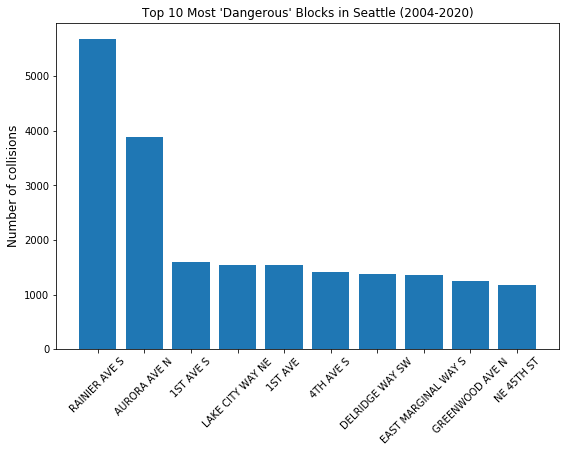

In [19]:
fig, ax = plt.subplots(figsize=(9,6))
top_10 = collision_streets.value_counts().sort_values(ascending=False)[:10]
ax.bar(top_10.index, top_10)
ax.set_title("Top 10 Most 'Dangerous' Blocks in Seattle (2004-2020)")
ax.set_ylabel('Number of collisions', size=12)
ax.tick_params(axis='x', labelrotation=45)
#plt.savefig('DangerBlocks.png');

In [20]:
rainier_df = df[df['STNAME_ORD'] == 'RAINIER AVE S']

In [21]:
print (rainier_df['SPEEDLIMIT'].value_counts())
print (rainier_df['ARTCLASS'].value_counts())
print (rainier_df['SURFACETYPE_1'].value_counts())

25.0    103
Name: SPEEDLIMIT, dtype: int64
1.0    103
Name: ARTCLASS, dtype: int64
AC/PCC    101
Name: SURFACETYPE_1, dtype: int64


In [22]:
collision_counts = collision_streets.value_counts()
target_streets = collision_counts[collision_counts > 100].index
df_reduced = df[df['STNAME_ORD'].isin(target_streets)]

In [23]:
def aggregate_collision_streets(df, target, sub_features):
    columns=[target]
    columns.extend(sub_features)
    #for feat in sub_features:
      #  columns.append(feat)
      #  if df[feat].dtype=='float64'
      #  columns.append(feat+'_')
    out = pd.DataFrame(columns=columns)
    for i, label in enumerate(df[target].unique()):
        new_row = [label]
        for feat in sub_features:
            slice_ = df[df[target] == label][feat]
            if slice_.dtype == 'float64':
                mu = round(slice_.mean(), 2)
                std = round(slice_.std(), 3)
                new_row.append([mu, std])
            else:
                vc = list(slice_.value_counts().index)
                if len(vc) > 3:
                    vc = vc[:3]
                new_row.append(vc)
        out.loc[i] = new_row
    return out

aggregate_collision_streets(df_reduced, 'STNAME_ORD', ['SPEEDLIMIT', 'ARTCLASS', 'STREETTYPE'])

,STNAME_ORD,SPEEDLIMIT,ARTCLASS,STREETTYPE
0,1ST AVE,"[25.0, 0.0]","[2.0, 0.0]",[Downtown Neighborhood]
1,1ST AVE N,"[21.08, 2.397]","[0.22, 0.479]","[Neighborhood Yield Street, Urban Village Main..."
2,1ST AVE NE,"[23.52, 5.548]","[1.22, 1.383]","[Neighborhood Yield Street, Neighborhood Corri..."
3,1ST AVE NW,"[20.0, 0.0]","[0.0, 0.0]","[Neighborhood Yield Street, Urban Village Neig..."
4,1ST AVE S,"[30.32, 6.203]","[1.06, 0.704]","[Industrial Access, Downtown Neighborhood, Min..."
5,1ST AVE W,"[21.11, 2.118]","[0.63, 1.214]","[Neighborhood Yield Street, Urban Village Neig..."
6,10TH AVE,"[20.0, 0.0]","[0.0, 0.0]",[Urban Village Neighborhood Access]
7,10TH AVE E,"[22.86, 2.535]","[1.14, 1.014]","[Urban Center Connector, Urban Village Neighbo..."
8,11TH AVE,"[20.5, 1.581]","[0.2, 0.632]","[Urban Village Neighborhood Access, Urban Vill..."
9,11TH AVE NE,"[22.27, 2.548]","[0.45, 0.51]","[Neighborhood Yield Street, Urban Village Main..."


In [24]:
# Do it again for our new DF
col_na = round(100*(df_reduced.isna().sum()/len(df)), 2)
col_nunique = df_reduced.nunique()
df_summary = pd.DataFrame({"data_type": df_reduced.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary

,data_type,percent_missing_values,total_unique_values
SURFACETYPE_2,object,36.71,5
SURFACETYPE_1,object,1.29,6
STREETTYPE,object,0.61,12
TRANDESCRIPT,object,0.12,7
SLOPE_PCT,float64,0.04,25
DIRHI,object,0.01,8
INTRHI,object,0.01,7688
INTRLO,object,0.00,7672
DIRLO,object,0.00,9
INTKEYLO,float64,0.00,7672


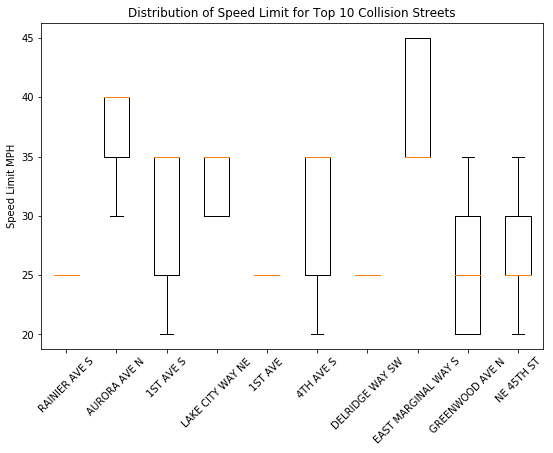

In [29]:
fig, ax = plt.subplots(figsize=(9,6))
speeds = [df[df['STNAME_ORD'] == i]['SPEEDLIMIT'].values for i in top_10.index]

ax.boxplot(speeds)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Speed Limit for Top 10 Collision Streets')
ax.set_ylabel('Speed Limit MPH');
#plt.savefig('SPEEDLIMITforDangerBlocks.png');

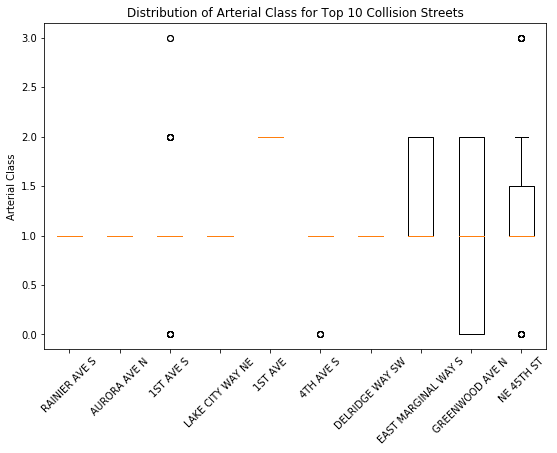

In [30]:
fig, ax = plt.subplots(figsize=(9,6))
classes = [df[df['STNAME_ORD'] == i]['ARTCLASS'].values for i in top_10.index]

ax.boxplot(classes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Arterial Class for Top 10 Collision Streets')
ax.set_ylabel('Arterial Class');
#plt.savefig('ARTCLASSforDangerBlocks.png');

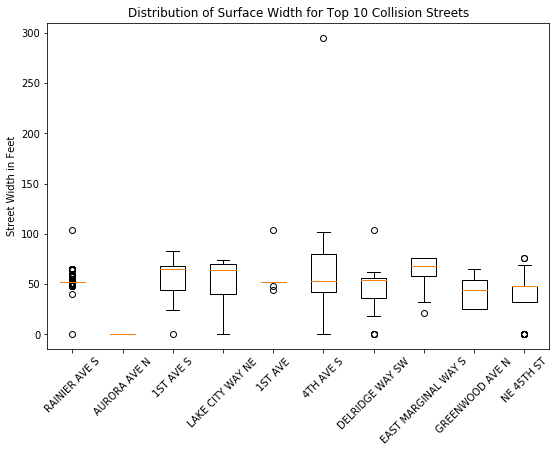

In [32]:
fig, ax = plt.subplots(figsize=(9,6))
slopes = [df[df['STNAME_ORD'] == i]['SURFACEWIDTH'].values for i in top_10.index]

ax.boxplot(slopes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Surface Width for Top 10 Collision Streets')
ax.set_ylabel('Street Width in Feet');
#plt.savefig('WIDTHforDangerBlocks.png');

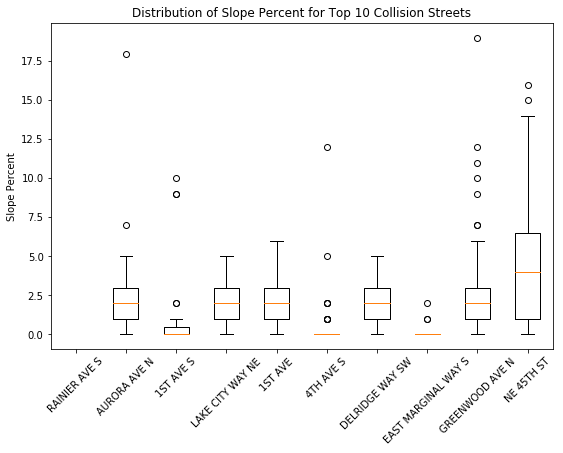

In [31]:
fig, ax = plt.subplots(figsize=(9,6))
slopes = [df[df['STNAME_ORD'] == i]['SLOPE_PCT'].values for i in top_10.index]

ax.boxplot(slopes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Slope Percent for Top 10 Collision Streets')
ax.set_ylabel('Slope Percent');
#plt.savefig('SLOPESforDangerBlocks.png');